### Analysis of how many new hires there would be on runtime if it ran every 2 weeks ###

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# show plots in the notebook
%matplotlib inline
# maxing out display to show/output full dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

filepath = 'https://toolbox.fhcrc.org/csv/employees.csv'

Functions

In [2]:
# Get the file from toolbox
def get_employees(filepath):
    '''take a filepath and retrieves employee.csv from Toolbox'''
    try:
        return pd.read_csv(filepath, usecols=['employeeID','mail','hireDate','jobTitle','deptID'], parse_dates=['hireDate'], infer_datetime_format=True)
    except:
        print("Error: retrieving employees.csv")
        
# Select new hires by deptID
def hires_by_deptID(df):
    '''selects new hires by deptID'''
    deptID_list = ['PH06'] #`PH06`= Computational Biology 
    try:
        return df[df.deptID.isin(deptID_list)]
    except:
        print("Error: selecting by deptID")

# Select new hires by jobTitle
def hires_by_jobTitle(df):
    '''selects new hires by jobTitle'''
    jobTitle_list = ['Post-Doctoral Research Fellow',
                     'Staff Scientist',
                     'Research Techn II',
                     'Graduate Research Asst',
                     'Assistant Member',
                     'Research Techn III',
                     'Research Assc (PhD or MD)',
                     'Sr Staff Scientist',
                     'Research Techn IV',
                     'Data Coord III',
                     'Data Coord II',
                     'Stat Research Assc II',
                     'Stat Research Assc IV',
                     'Stat Research Assc III',
                     'Software Dev Engineer II',
                     'Data Coord IV',
                     'Software Dev Engineer III',
                     'Statistical Analyst, Sr',
                     'Principal Staff Scientist',
                     'Stat Research Assc V',
                     'Statistical Programmer III',
                     'Research Asst (Pre-Doc)',
                     'Statistical Programmer IV',
                     'Software Dev Engineer IV',
                     'Bioinformatics Analyst I',
                     'Data Scientist I',
                     'Bioinformatics Analyst III',
                     'Stat Research Assc I'
               ] # List of job titles taken from `dirks-issue.xlxs` and marked as "yes" or "possibly"
    try:
        return df[df.jobTitle.isin(jobTitle_list)]
    except:
        print("Error: selecting by jobTitle")

# Grab the data and transform from daily to bi-weekly
def resample_count(df):
    '''function takes df with targeted `hireDate` col, resample that col and does count'''
    # convert `hireDate` from timestamp to datetime and set `hireDate` as index of df and sort
    df = df.set_index(pd.DatetimeIndex(df['hireDate'])).sort_index()
    t_index = pd.date_range(start='1981-09-06', end=df.index.max(), freq='2W')
    # resample the df from daily datetime to 2 week interval and count rows in the 2 week interval
    return df.hireDate.resample('2W-SUN').count().reindex(t_index, method='ffill').fillna(0).astype(int)

# Plot the data
def plot(data):
    # setting seaborn params
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.lineplot(data=data)

Analysis Code

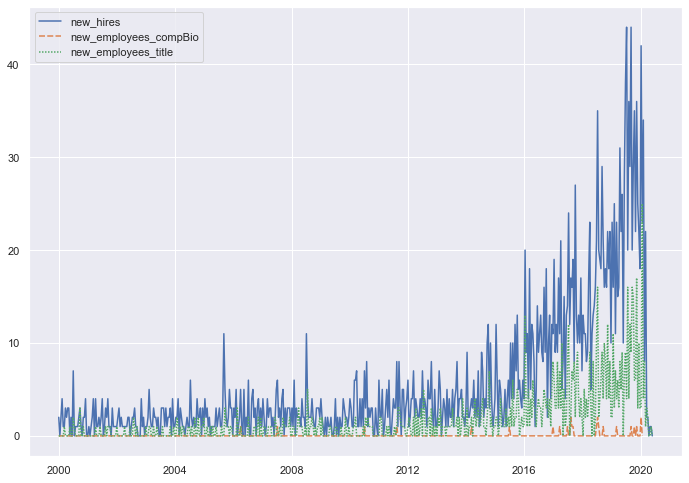

In [3]:
results = pd.DataFrame(index=resample_count(get_employees(filepath)).index) # create new df using the date range index from the original file to set date index
results['new_hires'] = resample_count(get_employees(filepath)) # load in new hires
# Get new hires by department ID
results['new_employees_compBio'] = resample_count(hires_by_deptID(get_employees(filepath))) # get new hires in deptID 'PH06' ie CompBio
# Get new hires by job title
results['new_employees_title'] = resample_count(hires_by_jobTitle(get_employees(filepath))) # get new hires by job titles
# Plot the data
plot(results['2000':])

Based on the new hire data from 2000 to now and a two-week retrieval cycle the potential max number of email addresses that this script would have to process and email in a given runtime is 44. Since we are not targeting all new hires but instead a subset of those hired into CompBio and/or those matching targeted job titles the potential max that the script will handle will be even less; approximately 27 (combination of the maxs from 'new_employees_compBio' and 'new_employees_title')